
# Analysis of Top 50 Spotify Tracks of 2019

###### At the end of each year, Spotify compiles a playlist of the songs streamed most often over the course of that year. The playlist Top Tracks of 2019 includes 50 songs. The question is: What is the relationship between top Genres and Artists? Why do people like these songs?
##### Data Source: Kaggle
##### Data Description: There is one .xlsx file in the dataset. (Spotify analysis.xlsx) This file includes:
1. Name of the song
2. Artist of the song
3. Genre of the song
4. Audio features for the song (such as danceability, tempo, key etc.)
At the end of this notebook, we will provide a conclusion of our study


###  Import Numpy, Pandas, Matplotlib, Seaborn

In [53]:
import pandas as pd
import numpy as np

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###      Read the csv file as a Dataframe named df

In [55]:
df=pd.read_excel('Spotify analysis.xlsx',index=False)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [57]:
df.columns=['Position','Track Name','Artist Name','Genre','Beats Per Minute','Energy','Danceability','Loudness','Liveness','Valence','Length','Acousticness','Speechiness','Popularity']

In [58]:
df.head()

,Position,Track Name,Artist Name,Genre,Beats Per Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


### Conversion of column 'length' into standard time format

In [59]:
df['temp']=((df['Length']/60).astype('int'))

In [60]:
df['Duration'] = pd.to_timedelta((df['Length']/60).astype('int'), unit='m')+pd.to_timedelta((df['Length']-(df['temp']*60)).astype('int'), unit='s')

In [61]:
df.drop('temp',axis=1,inplace=True)

In [62]:
df.drop('Length',axis=1,inplace=True)

In [63]:
df.drop('Position',axis=1,inplace=True)

### Identification of correlation between columns

For this we will make use pf corr() function of pandas to create a heat map to find the correlation between various columns.

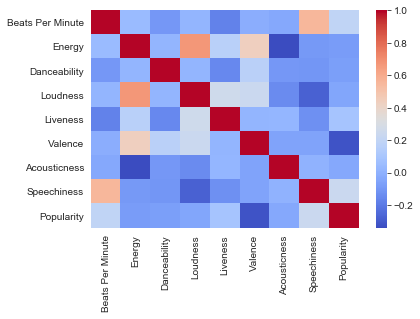

In [64]:
df.head()
sns.heatmap(df.corr(),cmap='coolwarm')

### Top 5 Artists with Maximum Presence in 2018

In [65]:
df['Artist Name'].value_counts().head(5)

Ed Sheeran      4
Shawn Mendes    2
Lil Nas X       2
Marshmello      2
Sech            2
Name: Artist Name, dtype: int64

### Danceability Column Analysis


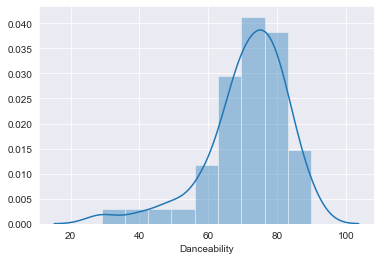

In [66]:
sns.set_style('darkgrid');
sns.distplot(df['Danceability'])



##### Analysis:  In this graph we can see that all tracks with value greater than a 60 are considered danceable. To make better analysis, let us divide them into 3 groups:
1. Greater than 80: Extremely Danceable
2. Greater than 60 & Less than 80: Moderately Danceable
3. Less than 60: Non Danceable

In [134]:
Vd=df['Danceability']>=80
Rd=(df['Danceability']>=60) & (df['Danceability']<80)
Nd=df['Danceability']<60

In [135]:
Dancing=[Vd.sum(),Rd.sum(),Nd.sum()]

In [136]:
Dance=pd.DataFrame(Dancing,columns=['Percent'],index=['Extremely Danceable','Moderately Danceable','Not Danceable'])

In [137]:
Dance

,Percent
Extremely Danceable,13
Moderately Danceable,30
Not Danceable,7


### Energy Column Analysis

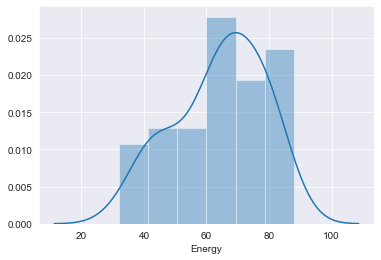

In [71]:
sns.distplot(df['Energy'])

##### Analysis:
In this graph we can see that all tracks with value greater than 60 are considered energetic. To make better analysis, let us divide them into 3 groups:
1. Greater than 75%: Extremely Energetic
2. Greater than 60% & Less than 75%: Moderately Energetic
3. Less than 60%: Non Energetic

In [72]:
Ve=df['Energy']>=75
Re=(df['Energy']>=60) & (df['Energy']<75)
Ne=df['Energy']<60

In [73]:
Energy=[Ve.sum(),Re.sum(),Ne.sum()]

In [74]:
En=pd.DataFrame(Energy,columns=['Total'],index=['Extremely Energetic','Moderately Energetic','Not Energetic'])

In [75]:
En

,Total
Extremely Energetic,13
Moderately Energetic,20
Not Energetic,17


### Correlation Zone
We will consider the most important columns according to the preliminary analysis of Heat Map previously seen

In [76]:
correlation=df[['Energy','Danceability','Loudness','Liveness','Valence','Acousticness','Speechiness','Popularity']]

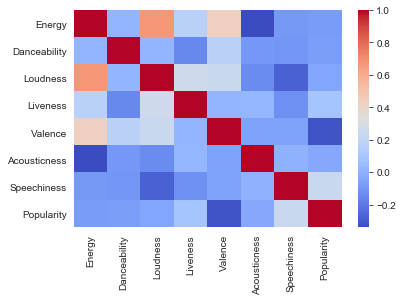

In [77]:
sns.heatmap(correlation.corr(),cmap='coolwarm')

###  Top 10 most Danceable Songs

In [78]:
df[['Track Name','Artist Name','Genre','Energy','Danceability','Popularity']].sort_values('Danceability',ascending=False).head(10)


,Track Name,Artist Name,Genre,Energy,Danceability,Popularity
43,Talk,Khalid,pop,40,90,84
44,Con Altura,ROSALIA,r&b en espanol,69,88,88
8,Old Town Road - Remix,Lil Nas X,country rap,62,88,87
38,Sucker,Jonas Brothers,boy band,73,84,80
18,Lalala,Y2K,canadian hip hop,39,84,88
14,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,50,83,92
26,Dance Monkey,Tones and I,australian pop,59,82,83
11,Loco Contigo (feat. J. Balvin & Tyga),DJ Snake,dance pop,71,82,86
39,"fuck, i'm lonely (with Anne-Marie) - from “13 ...",Lauv,dance pop,56,81,78
22,No Me Conoce - Remix,Jhay Cortez,reggaeton flow,79,81,83


###  Top 10 most Energetic Songs

In [79]:
df[['Track Name','Artist Name','Genre','Energy','Danceability','Popularity']].sort_values('Energy',ascending=False).head(10)


,Track Name,Artist Name,Genre,Energy,Danceability,Popularity
34,Never Really Over,Katy Perry,dance pop,88,77,89
28,Con Calma,Daddy Yankee,latin,86,74,91
25,If I Can't Have You,Shawn Mendes,canadian pop,82,69,70
37,Antisocial (with Travis Scott),Ed Sheeran,pop,82,72,87
1,China,Anuel AA,reggaeton flow,81,79,92
2,boyfriend (with Social House),Ariana Grande,dance pop,80,40,85
13,Otro Trago - Remix,Sech,panamanian pop,79,73,87
47,Happier,Marshmello,brostep,79,69,88
29,QUE PRETENDES,J Balvin,latin,79,64,89
22,No Me Conoce - Remix,Jhay Cortez,reggaeton flow,79,81,83


### We maintain data between Energy and Popularity

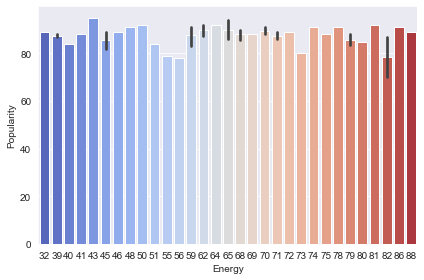

In [80]:
plt.subplot(1,1,1)
sns.barplot(x='Energy',y='Popularity',data=df,palette='coolwarm')
plt.tight_layout()

### We maintain data between Energy and Popularity

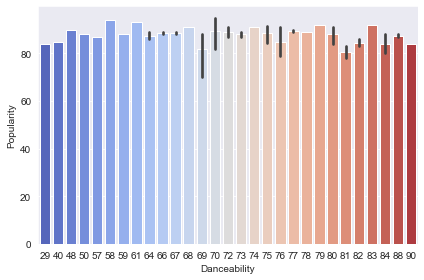

In [81]:
plt.subplot(1,1,1)
sns.barplot(x='Danceability',y='Popularity',data=df,palette='coolwarm')
plt.tight_layout()

### Musical Tempo
Musical Tempo is defined as the speed or pace at which a section of music is played. Tempo helps the composer to convey a feeling of either intensity or relaxation. We can think of the tempo as the speedometer of the music. Typically, the speed of the music is measured in beats per minute, or BPM.

The 5 most usual ones were:
1. Adagio: slow and majestic (66 to 85 bpm)
2. Andante: at the pace, quiet, a little vivacious (86 to 100 bpm)
3. Allegretto: Fast beats (101 to 120 bpm)
4. Allegro: animated and fast. (120 to 156 bpm)
5. Vivace: faster then Allegro. (156 to 176 bpm)
5. Presto: very fast. (176 to 200 bpm)

In [82]:
def Rhythm(value):
    if value <= 85:
        return 'Adagio'
    elif value > 86 and value <= 100:
        return 'Andante'
    elif value>101 and value<=120:
        return 'Allegretto'
    elif value > 120 and value <= 156:
        return 'Allegro'
    elif value > 156 and value <= 176:
        return 'Vivace'
    elif value>176:
        return 'Presto'

In [83]:
df['Rhythm']=df['Beats Per Minute'].apply(Rhythm)
df.head()

,Track Name,Artist Name,Genre,Beats Per Minute,Energy,Danceability,Loudness,Liveness,Valence,Acousticness,Speechiness,Popularity,Duration,Rhythm
0,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,4,3,79,00:03:11,Allegretto
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,8,9,92,00:05:02,Allegretto
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,12,46,85,00:03:06,Presto
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,12,19,86,00:03:18,Andante
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,45,7,94,00:02:55,Allegro



### Classification according to Tempo¶

In [84]:
df['Rhythm'].value_counts()

Andante       19
Allegro       12
Allegretto     8
Vivace         6
Presto         2
Adagio         2
Name: Rhythm, dtype: int64

### Analysis of Top 3 Artists

In [112]:
df['Artist Name'].value_counts().head(3)

Ed Sheeran      4
Shawn Mendes    2
Lil Nas X       2
Name: Artist Name, dtype: int64

### Artist : Ed Sheeran

In [132]:
EdSheeran=df[df['Artist Name']=='Ed Sheeran']
EdSheeran[['Artist Name','Track Name','Genre','Danceability','Energy','Loudness','Liveness','Valence','Acousticness','Speechiness','Popularity',]]

,Artist Name,Track Name,Genre,Danceability,Energy,Loudness,Liveness,Valence,Acousticness,Speechiness,Popularity,Rhythm
3,Ed Sheeran,Beautiful People (feat. Khalid),pop,64,65,-8,8,55,12,19,86,Andante
5,Ed Sheeran,I Don't Care (with Justin Bieber),pop,80,68,-5,9,84,9,4,84,Allegretto
37,Ed Sheeran,Antisocial (with Travis Scott),pop,72,82,-5,36,91,13,5,87,Allegro
49,Ed Sheeran,Cross Me (feat. Chance the Rapper & PnB Rock),pop,75,79,-6,7,61,21,12,82,Andante


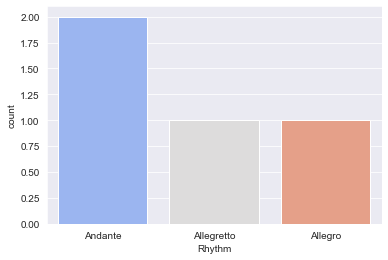

In [88]:
sns.countplot(x='Rhythm',data=EdSheeran,palette='coolwarm')

### Artist : J Balvin

In [133]:
JBalvin=df[df['Artist Name']=='J Balvin']
JBalvin[['Artist Name','Track Name','Genre','Danceability','Energy','Loudness','Liveness','Valence','Acousticness','Speechiness','Popularity',]]

,Artist Name,Track Name,Genre,Danceability,Energy,Loudness,Liveness,Valence,Acousticness,Speechiness,Popularity,Rhythm
16,J Balvin,LA CANCION,latin,75,65,-6,11,43,15,32,90,Vivace
29,J Balvin,QUE PRETENDES,latin,64,79,-4,36,94,3,25,89,Andante


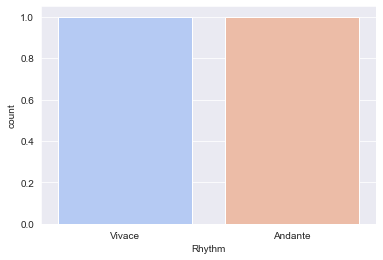

In [90]:
sns.countplot(x='Rhythm',data=JBalvin,palette='coolwarm')

### Artist : Post Malone

In [93]:
PostMalone=df[df['Artist Name']=='Post Malone']
PostMalone[['Artist Name','Track Name','Genre','Danceability','Energy','Loudness','Liveness','Valence','Acousticness','Speechiness','Popularity']]

,Artist Name,Track Name,Genre,Danceability,Energy,Loudness,Liveness,Valence,Acousticness,Speechiness,Popularity
4,Post Malone,Goodbyes (Feat. Young Thug),dfw rap,58,65,-4,11,18,45,7,94
17,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,dfw rap,76,48,-6,7,91,56,5,91


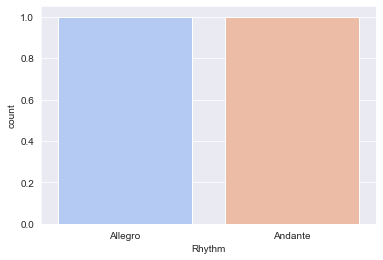

In [94]:
sns.countplot(x='Rhythm',data=PostMalone,palette='coolwarm')

### Analysis of Top 3 Genres

In [160]:
df['Genre'].value_counts().head(5)

dance pop           8
pop                 7
latin               5
edm                 3
canadian hip hop    3
Name: Genre, dtype: int64

### Genre: Dance Pop

In [109]:
DancePop=df[df['Genre']=='dance pop']
DancePop[['Artist Name','Genre','Danceability','Energy','Loudness','Liveness','Valence','Acousticness','Speechiness','Rhythm']]

,Artist Name,Genre,Danceability,Energy,Loudness,Liveness,Valence,Acousticness,Speechiness,Rhythm
2,Ariana Grande,dance pop,40,80,-4,16,70,12,46,Presto
11,DJ Snake,dance pop,82,71,-4,15,38,28,7,Andante
15,Chris Brown,dance pop,70,45,-7,16,14,12,15,Andante
31,Ariana Grande,dance pop,78,32,-11,9,33,59,33,Allegro
34,Katy Perry,dance pop,77,88,-5,32,39,19,6,Andante
39,Lauv,dance pop,81,56,-6,6,68,48,7,Andante
41,Taylor Swift,dance pop,77,68,-6,7,73,1,5,Adagio
42,Lady Gaga,dance pop,57,39,-6,23,32,37,3,Andante


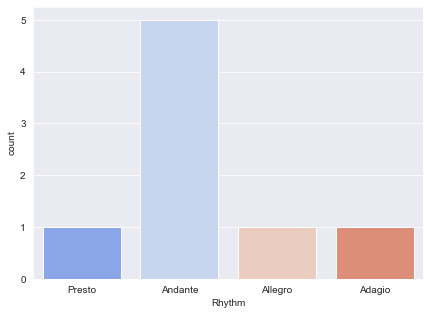

In [138]:
fig=plt.figure(figsize=(7,5))
fig=sns.countplot(x='Rhythm',data=DancePop,palette='coolwarm')

### Genre: Pop

In [139]:
Pop=df[df['Genre']=='pop']
Pop[['Artist Name','Genre','Danceability','Energy','Loudness','Liveness','Valence','Acousticness','Speechiness','Rhythm']]

,Artist Name,Genre,Danceability,Energy,Loudness,Liveness,Valence,Acousticness,Speechiness,Rhythm
3,Ed Sheeran,pop,64,65,-8,8,55,12,19,Andante
5,Ed Sheeran,pop,80,68,-5,9,84,9,4,Allegretto
7,Sam Smith,pop,48,68,-5,8,35,15,9,Allegretto
12,Lewis Capaldi,pop,50,41,-6,11,45,75,3,Allegretto
37,Ed Sheeran,pop,72,82,-5,36,91,13,5,Allegro
43,Khalid,pop,90,40,-9,6,35,5,13,Allegro
49,Ed Sheeran,pop,75,79,-6,7,61,21,12,Andante


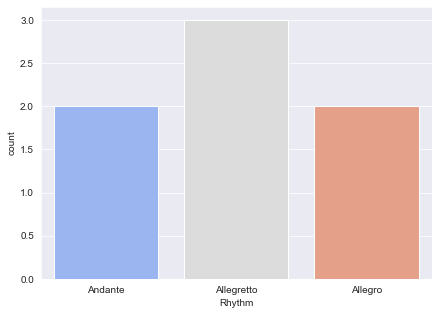

In [140]:
fig=plt.figure(figsize=(7,5))
fig=sns.countplot(x='Rhythm',data=Pop,palette='coolwarm')

### Genre: Latin

In [141]:
Latin=df[df['Genre']=='latin']
Latin[['Artist Name','Genre','Danceability','Energy','Loudness','Liveness','Valence','Acousticness','Speechiness','Rhythm']]

,Artist Name,Genre,Danceability,Energy,Loudness,Liveness,Valence,Acousticness,Speechiness,Rhythm
16,J Balvin,latin,75,65,-6,11,43,15,32,Vivace
23,Lunay,latin,80,78,-4,44,80,36,4,Andante
28,Daddy Yankee,latin,74,86,-3,6,66,11,6,Andante
29,J Balvin,latin,64,79,-4,36,94,3,25,Andante
46,Nicky Jam,latin,67,75,-4,8,80,24,6,Vivace


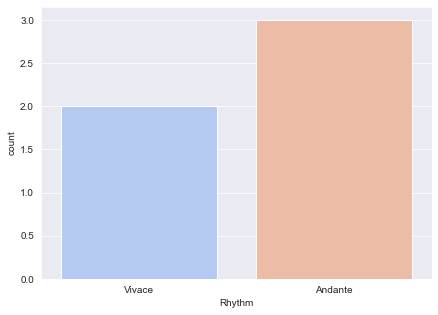

In [142]:
fig=plt.figure(figsize=(7,5))
fig=sns.countplot(x='Rhythm',data=Latin,palette='coolwarm')

### Top 10 Most Positive Songs

Tracks with High Valence sound more positive, while Tracks with Low Valence sound negative

In [143]:
df[['Track Name','Artist Name','Genre','Energy','Danceability','Loudness','Liveness','Valence','Acousticness','Speechiness','Popularity',
    'Rhythm']].sort_values(by='Valence',ascending=False).head(10)

,Track Name,Artist Name,Genre,Energy,Danceability,Loudness,Liveness,Valence,Acousticness,Speechiness,Popularity,Rhythm
38,Sucker,Jonas Brothers,boy band,73,84,-5,11,95,4,6,80,Allegro
29,QUE PRETENDES,J Balvin,latin,79,64,-4,36,94,3,25,89,Andante
37,Antisocial (with Travis Scott),Ed Sheeran,pop,82,72,-5,36,91,13,5,87,Allegro
17,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,48,76,-6,7,91,56,5,91,Andante
25,If I Can't Have You,Shawn Mendes,canadian pop,82,69,-4,13,87,49,6,70,Allegro
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,68,80,-5,9,84,9,4,84,Allegretto
46,Te Robare,Nicky Jam,latin,75,67,-4,8,80,24,6,88,Vivace
23,Soltera - Remix,Lunay,latin,78,80,-4,44,80,36,4,91,Andante
13,Otro Trago - Remix,Sech,panamanian pop,79,73,-2,6,76,7,20,87,Vivace
44,Con Altura,ROSALIA,r&b en espanol,69,88,-4,5,75,39,12,88,Andante


##### Analysis:  
The Top 10 Songs in the above categories show that songs with categories Andante and Allegro are more positive and songs with categories Allegro are more danceable

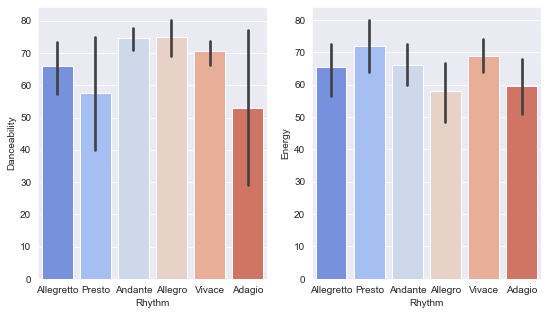

In [104]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
sns.barplot(x='Rhythm', y='Danceability', data=df, palette='coolwarm')
plt.subplot(1,2,2)
sns.barplot(x='Rhythm', y='Energy', data=df, palette='coolwarm')

##### Analysis:  
The above graphs show that Rhythms Andante and Allegro are more danceable while Presto and Vivace have more Energy

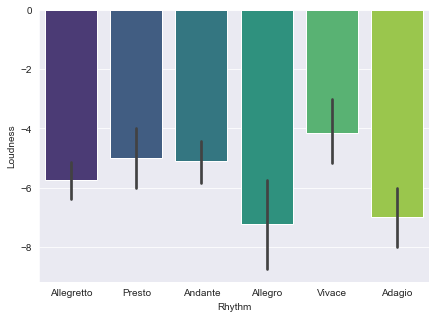

In [106]:
fig=plt.figure(figsize=(7,5))
fig=sns.barplot(x='Rhythm',y='Loudness',data=df,palette='viridis')

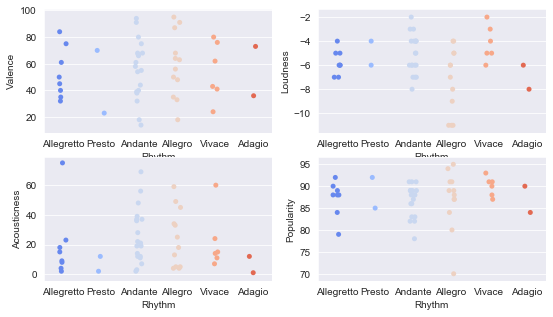

In [144]:
plt.figure(figsize=(9,5))
plt.subplot(2,2,1)
sns.stripplot(x='Rhythm',y='Valence',data=df,palette='coolwarm')
plt.subplot(2,2,2)
sns.stripplot(x='Rhythm',y='Loudness',data=df,palette='coolwarm')
plt.subplot(2,2,3)
sns.stripplot(x='Rhythm',y='Acousticness',data=df,palette='coolwarm')
plt.subplot(2,2,4)
sns.stripplot(x='Rhythm',y='Popularity',data=df,palette='coolwarm')

##### Analysis:  
It clearly shows that the rhythm Allegro has higher number of the most popular songs but varies in overall popularity while Andante produces constant results which have decent popularity

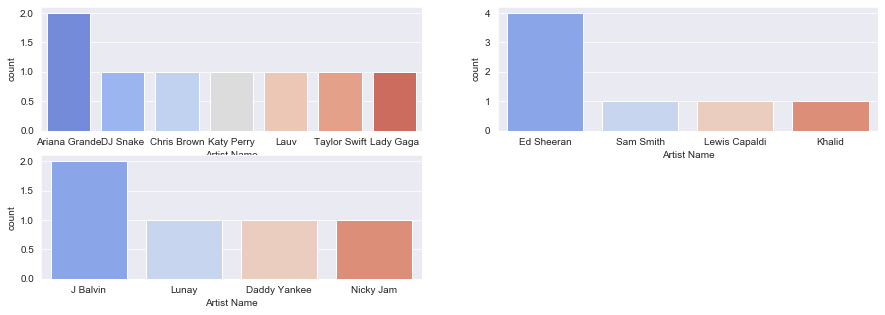

In [145]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.countplot(x='Artist Name',data=DancePop,palette='coolwarm')
plt.subplot(2,2,2)
sns.countplot(x='Artist Name',data=Pop,palette='coolwarm')
plt.subplot(2,2,3)
sns.countplot(x='Artist Name',data=Latin,palette='coolwarm')

## Conclusion

To answer the questions posed by this data set, we can say that the 3 most popular artists follow Pop, Latin and Rap.
On the other hand, Dance Pop genre had the most mentions 7 different artists following that Genre.
When we look it from a different perspective, we can see that Allegro and Andante were some of the most popular Rhythms. These Rhythms are characteristics of songs from the Genre of Pop and Dance Pop.
To conclude we can say that the most popular Genres were 
1. Dance Pop 
2. Pop
3. Latin

They shared 15 artists among them. Top Artists liked Ed Sheeran and J Balvin followed these genres.

We further concluded the relation between danceability, eneergy and valence based on which we analysed the top energetic, danceable and positive tracks